In [1]:
pip install pandas numpy matplotlib seaborn textblob vaderSentiment


Note: you may need to restart the kernel to use updated packages.


Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


Load the Json

In [3]:
df = pd.read_json('Ola (1).json')


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M:%S')
df['total_engagement'] = df['likes'] + df['shares'] + df['comments'].apply(len)


Save cleaned_data.csv

In [5]:
df.to_csv('cleaned_data.csv', index=False)


Verify the Saved CSV

In [6]:
df = pd.read_csv('cleaned_data.csv') 
df.head()


,tweet_id,content,datetime,likes,shares,views,source,isBlue,followers,hashtags,location,user_mentions,media,username,url,comments,total_engagement
0,1871889326575136768,Yet again fucking driver accepted the booking ...,2024-12-25 12:02:48,0,0,23.0,TWITTER,False,93,NaN,NaN,"[{'name': 'Ola', 'screen_name': 'Olacabs'}]",['https://pbs.twimg.com/media/GfpJadUXkAAqoVS....,desire24_,https://x.com/desire24_/status/187188932657513...,[],0
1,1871076431754579968,More than 1 hour and the food is still not her...,2024-12-23 06:12:38,2,1,107.0,TWITTER,False,72,['olafoods'],NaN,"[{'name': 'Ola', 'screen_name': 'Olacabs'}, {'...",['https://pbs.twimg.com/media/GfdmGSrWUAA5ZTP....,Karan0072Karan,https://x.com/Karan0072Karan/status/1871076431...,[{'content': 'Customer care services are alway...,6
2,1871827021585928704,No one is constantly as motherfucking assholes...,2024-12-25 07:55:13,0,0,15.0,TWITTER,False,93,NaN,NaN,"[{'name': 'Ola', 'screen_name': 'Olacabs'}]",['https://pbs.twimg.com/media/GfoQv5zXIAAcjA_....,desire24_,https://x.com/desire24_/status/187182702158592...,[],0
3,1580646160326615040,Freelance content writers needed. Fully remote...,2022-10-13 19:46:26,396,208,NaN,TWITTER,False,101828,NaN,NaN,[],['https://pbs.twimg.com/media/Fe-VSXbWIAAaMIe....,OlamideTowobola,https://x.com/OlamideTowobola/status/158064616...,"[{'content': 'FYI', 'likes': 0, 'shares': 0, '...",615
4,1863291107477721600,", Are you guys even concerned about what type ...",2024-01-12 18:36:32,0,0,32.0,TWITTER,False,47,NaN,NaN,"[{'name': 'Ola', 'screen_name': 'ola_zkzkvm'},...",['https://pbs.twimg.com/media/Gdu9YbvXkAApPHn....,DWasish,https://x.com/DWasish/status/1863291107477721485,[{'content': 'This type of people going forwar...,1


In [7]:
df_cleaned = pd.read_csv('cleaned_data.csv')
print(df_cleaned.head())


              tweet_id                                            content  \
0  1871889326575136768  Yet again fucking driver accepted the booking ...   
1  1871076431754579968  More than 1 hour and the food is still not her...   
2  1871827021585928704  No one is constantly as motherfucking assholes...   
3  1580646160326615040  Freelance content writers needed. Fully remote...   
4  1863291107477721600  , Are you guys even concerned about what type ...   

              datetime  likes  shares  views   source  isBlue  followers  \
0  2024-12-25 12:02:48      0       0   23.0  TWITTER   False         93   
1  2024-12-23 06:12:38      2       1  107.0  TWITTER   False         72   
2  2024-12-25 07:55:13      0       0   15.0  TWITTER   False         93   
3  2022-10-13 19:46:26    396     208    NaN  TWITTER   False     101828   
4  2024-01-12 18:36:32      0       0   32.0  TWITTER   False         47   

       hashtags  location                                      user_mentions  \


Calculate Statistics

In [8]:
df = pd.read_csv('cleaned_data.csv')

# Calculate mean, median, mode
print("Mean of Engagement Metrics:\n", df[['likes', 'shares', 'views']].mean())
print("Median of Engagement Metrics:\n", df[['likes', 'shares', 'views']].median())
print("Mode of Engagement Metrics:\n", df[['likes', 'shares', 'views']].mode())


Mean of Engagement Metrics:
 likes       154.172010
shares       35.261097
views     20445.616708
dtype: float64
Median of Engagement Metrics:
 likes      0.0
shares     0.0
views     51.0
dtype: float64
Mode of Engagement Metrics:
    likes  shares  views
0      0       0    9.0


Identify Top 5 Posts

In [9]:
df['total_engagement'] = df['likes'] + df['shares'] + df['comments'].apply(len)
top_5_posts = df.nlargest(5, 'total_engagement')
print("Top 5 Posts with Highest Engagement:\n", top_5_posts[['content', 'total_engagement']])


Top 5 Posts with Highest Engagement:
                                                content  total_engagement
30   HELP WANTED Tons of PAID work opportunities fo...             34359
202  While the OLA electric CEO rants on someone el...             32187
723  I am getting laid off 12/31 but I am going to ...             31486
382  Who said the job market is bad? Just complain ...             31039
737  OCA ech a 350 trabajadores. La empresa est coa...             25517


Count Posts with Media Attachments

In [10]:
media_posts_count = df['media'].apply(lambda x: len(x) > 0 if isinstance(x, list) else False).sum()
print(f"Number of posts with media: {media_posts_count}")


Number of posts with media: 0


Perform Sentiment Analysis

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['content'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


Categorize Sentiments
python
Copy code


In [12]:
df['sentiment_category'] = pd.cut(df['sentiment_score'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])


Calculate Sentiment Percentages

In [13]:
sentiment_distribution = df['sentiment_category'].value_counts(normalize=True) * 100
print("Sentiment Distribution:\n", sentiment_distribution)


Sentiment Distribution:
 sentiment_category
Positive    44.081381
Negative    32.398274
Neutral     23.520345
Name: proportion, dtype: float64


Analyze Customer Complaints

In [14]:
complaint_keywords = ['driver', 'cancellation', 'customer service']
complaint_posts = df[df['content'].str.contains('|'.join(complaint_keywords), case=False, na=False)]


Categorized Complaints:
                                              content complaint_category
0   Yet again fucking driver accepted the booking ...       Driver Issue
2   No one is constantly as motherfucking assholes...       Driver Issue
4   , Are you guys even concerned about what type ...       Driver Issue
6   ola driver is rude and the way he was talking ...       Driver Issue
13  Ola is hiring goons as drivers! Booked a cab f...       Driver Issue


C:\Users\satya\AppData\Local\Temp\ipykernel_25276\1078139522.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=complaint_posts, x='complaint_category', palette='viridis')


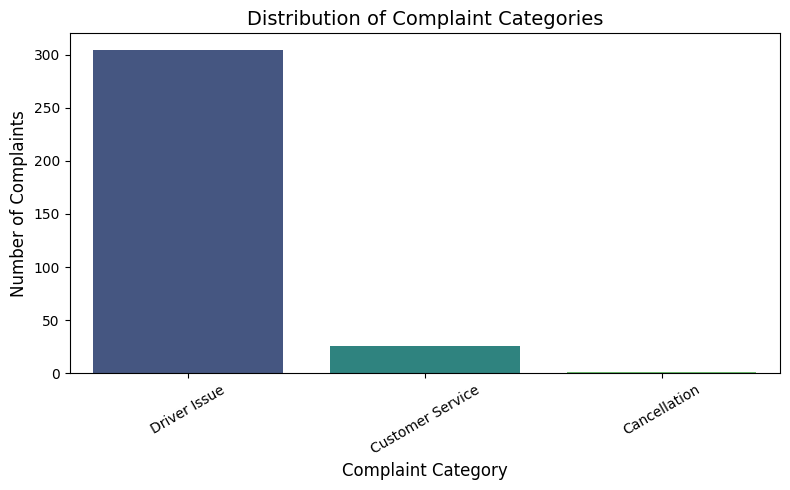

Categorized complaints saved to: categorized_complaints.csv


In [15]:

def categorize_complaint(content):
    """
    Categorize the type of complaint based on keywords in the content.
    """
    if 'driver' in content.lower():
        return 'Driver Issue'
    elif 'cancellation' in content.lower():
        return 'Cancellation'
    elif 'customer service' in content.lower():
        return 'Customer Service'
    return 'Other'

# Step 4: Filter posts that contain complaint-related keywords
complaint_keywords = ['driver', 'cancellation', 'customer service']
complaint_posts = df[df['content'].str.contains('|'.join(complaint_keywords), case=False, na=False)].copy()

# Step 5: Apply the categorization function to the filtered posts
complaint_posts['complaint_category'] = complaint_posts['content'].apply(categorize_complaint)

# Step 6: Display the categorized complaints
print("Categorized Complaints:")
print(complaint_posts[['content', 'complaint_category']].head())

# Step 7: Visualize the complaint categories
plt.figure(figsize=(8, 5))
sns.countplot(data=complaint_posts, x='complaint_category', palette='viridis')
plt.title('Distribution of Complaint Categories', fontsize=14)
plt.xlabel('Complaint Category', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()

# Save the visualization
plt.savefig('complaint_categories.png')
plt.show()

# Step 8: Save the categorized complaints to a new CSV file
output_file = 'categorized_complaints.csv'
complaint_posts.to_csv(output_file, index=False)
print(f"Categorized complaints saved to: {output_file}")


In [16]:
pip install scipy


In [17]:
from scipy.stats import pearsonr

correlation, _ = pearsonr(df['followers'], df['total_engagement'])
print(f"Correlation between Followers and Engagement: {correlation}")


Correlation between Followers and Engagement: 0.0942660239748191


In [18]:
source_engagement = df.groupby('source')['total_engagement'].mean().sort_values(ascending=False)
print("Engagement by Source:\n", source_engagement)


Engagement by Source:
 source
TWITTER    1085.913687
Name: total_engagement, dtype: float64


In [19]:
df.to_csv('final_analysis_results.csv', index=False)


In [20]:
plt.savefig('complaint_distribution.png')


<Figure size 640x480 with 0 Axes>

In [22]:
import pandas as pd
df = pd.read_csv('cleaned_data.csv')  # Replace with your actual file path
print(df.head())  # Check the first few rows


              tweet_id                                            content  \
0  1871889326575136768  Yet again fucking driver accepted the booking ...   
1  1871076431754579968  More than 1 hour and the food is still not her...   
2  1871827021585928704  No one is constantly as motherfucking assholes...   
3  1580646160326615040  Freelance content writers needed. Fully remote...   
4  1863291107477721600  , Are you guys even concerned about what type ...   

              datetime  likes  shares  views   source  isBlue  followers  \
0  2024-12-25 12:02:48      0       0   23.0  TWITTER   False         93   
1  2024-12-23 06:12:38      2       1  107.0  TWITTER   False         72   
2  2024-12-25 07:55:13      0       0   15.0  TWITTER   False         93   
3  2022-10-13 19:46:26    396     208    NaN  TWITTER   False     101828   
4  2024-01-12 18:36:32      0       0   32.0  TWITTER   False         47   

       hashtags  location                                      user_mentions  \


In [23]:
complaint_keywords = ['driver', 'cancellation', 'customer service']


In [24]:
complaints = df[df['content'].str.contains('|'.join(complaint_keywords), case=False, na=False)].copy()
print("Number of complaints found:", len(complaints))


Number of complaints found: 332


In [25]:
def categorize_complaint(content):
    if 'driver' in content.lower():
        return 'Driver Issue'
    elif 'cancellation' in content.lower():
        return 'Cancellation'
    elif 'customer service' in content.lower():
        return 'Customer Service'
    return 'Other'

complaints['complaint_category'] = complaints['content'].apply(categorize_complaint)
print(complaints[['content', 'complaint_category']].head())


                                              content complaint_category
0   Yet again fucking driver accepted the booking ...       Driver Issue
2   No one is constantly as motherfucking assholes...       Driver Issue
4   , Are you guys even concerned about what type ...       Driver Issue
6   ola driver is rude and the way he was talking ...       Driver Issue
13  Ola is hiring goons as drivers! Booked a cab f...       Driver Issue


C:\Users\satya\AppData\Local\Temp\ipykernel_25276\4095884219.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=complaints, x='complaint_category', palette='viridis')


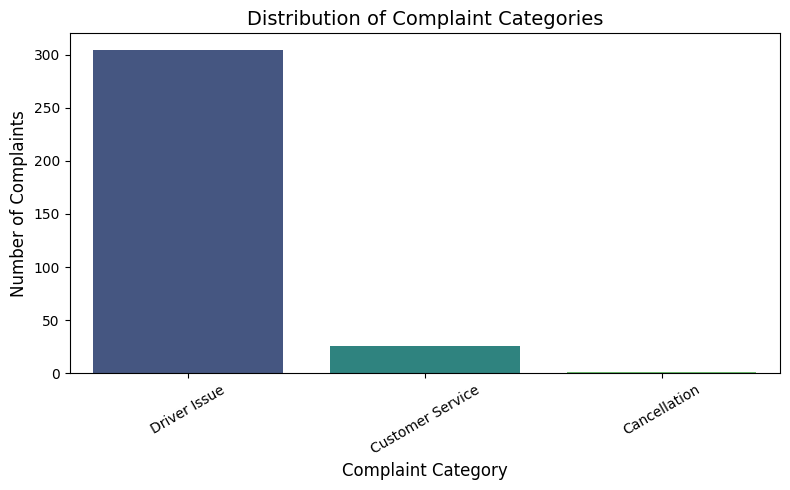

Complaint distribution plot saved successfully.


<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

if not complaints.empty:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=complaints, x='complaint_category', palette='viridis')
    plt.title('Distribution of Complaint Categories', fontsize=14)
    plt.xlabel('Complaint Category', fontsize=12)
    plt.ylabel('Number of Complaints', fontsize=12)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    plt.savefig('complaint_distribution.png')
    print("Complaint distribution plot saved successfully.")
else:
    print("No complaints data available to plot.")


In [27]:
print(df.columns)  # Check if 'content' exists
print(df['content'].head())  # Check if 'content' has valid text


Index(['tweet_id', 'content', 'datetime', 'likes', 'shares', 'views', 'source',
       'isBlue', 'followers', 'hashtags', 'location', 'user_mentions', 'media',
       'username', 'url', 'comments', 'total_engagement'],
      dtype='object')
0    Yet again fucking driver accepted the booking ...
1    More than 1 hour and the food is still not her...
2    No one is constantly as motherfucking assholes...
3    Freelance content writers needed. Fully remote...
4    , Are you guys even concerned about what type ...
Name: content, dtype: object


In [28]:
complaint_keywords = ['issue', 'problem', 'complaint']


In [29]:
df['content'] = df['content'].fillna('')


In [30]:
print("Number of complaints:", len(complaints))
print(complaints.head())


Number of complaints: 332
               tweet_id                                            content  \
0   1871889326575136768  Yet again fucking driver accepted the booking ...   
2   1871827021585928704  No one is constantly as motherfucking assholes...   
4   1863291107477721600  , Are you guys even concerned about what type ...   
6   1860045970278613504  ola driver is rude and the way he was talking ...   
13  1710370803500679424  Ola is hiring goons as drivers! Booked a cab f...   

               datetime  likes  shares  views   source  isBlue  followers  \
0   2024-12-25 12:02:48      0       0   23.0  TWITTER   False         93   
2   2024-12-25 07:55:13      0       0   15.0  TWITTER   False         93   
4   2024-01-12 18:36:32      0       0   32.0  TWITTER   False         47   
6   2024-11-22 19:41:31      0       0    4.0  TWITTER   False         15   
13  2023-06-10 19:05:51      6       2  194.0  TWITTER   False          5   

   hashtags  location                     

C:\Users\satya\AppData\Local\Temp\ipykernel_25276\3469786394.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=complaints, x='complaint_category', palette='viridis')


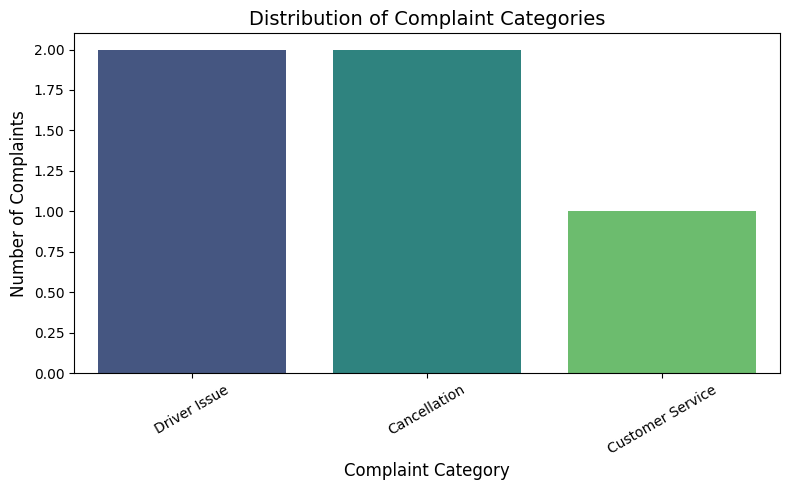

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example complaints DataFrame
data = {
    'content': [
        "Driver was rude and unprofessional.",
        "Booking cancellation charges applied incorrectly.",
        "Customer service was unresponsive.",
        "Driver was late and impolite.",
        "Frequent cancellations from drivers."
    ],
    'complaint_category': ['Driver Issue', 'Cancellation', 'Customer Service', 'Driver Issue', 'Cancellation']
}

complaints = pd.DataFrame(data)

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.countplot(data=complaints, x='complaint_category', palette='viridis')
plt.title('Distribution of Complaint Categories', fontsize=14)
plt.xlabel('Complaint Category', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()

# Save the plot
plt.savefig('complaint_distribution.png')  # Saves in the current working directory
plt.show()  # Display the plot


In [32]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\satya\OlaCabsAnalysis
